In [ ]:
!pip install statsmodels --upgrade

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
covv = pd.read_csv('/content/drive/MyDrive/covid.csv', index_col=0, parse_dates = True)

In [ ]:
#mjd flux
!pip install pmdarima
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima as ar
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA as AR
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Text(0, 0.5, 'Flux')

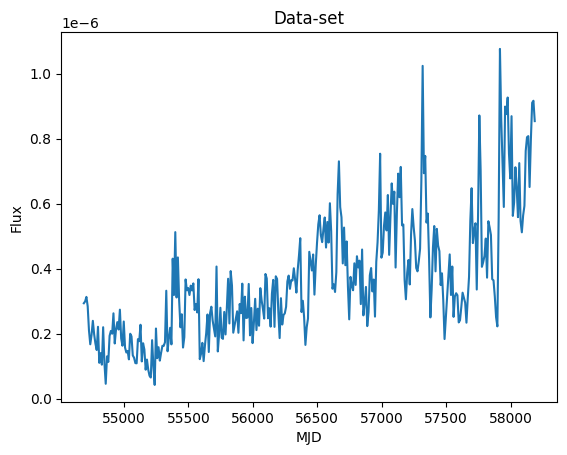

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/mjd_flux.csv")
#plt.figure(figsize=(20,6))
plt.plot(data["MJD"],data["FLUX"])
plt.title("Data-set")
plt.xlabel("MJD")
plt.ylabel("Flux")

In [ ]:
def ad_test(dataset):
  datatest = adfuller(dataset)
  print("P value: ", datatest[1])

In [ ]:
ad_test(data["FLUX"])

P value:  0.8050302703804764


In [ ]:
d = data.diff(periods = 1,axis = 0)

In [ ]:
data["FD"] = d["FLUX"].fillna(0)

Text(0, 0.5, 'Flux')

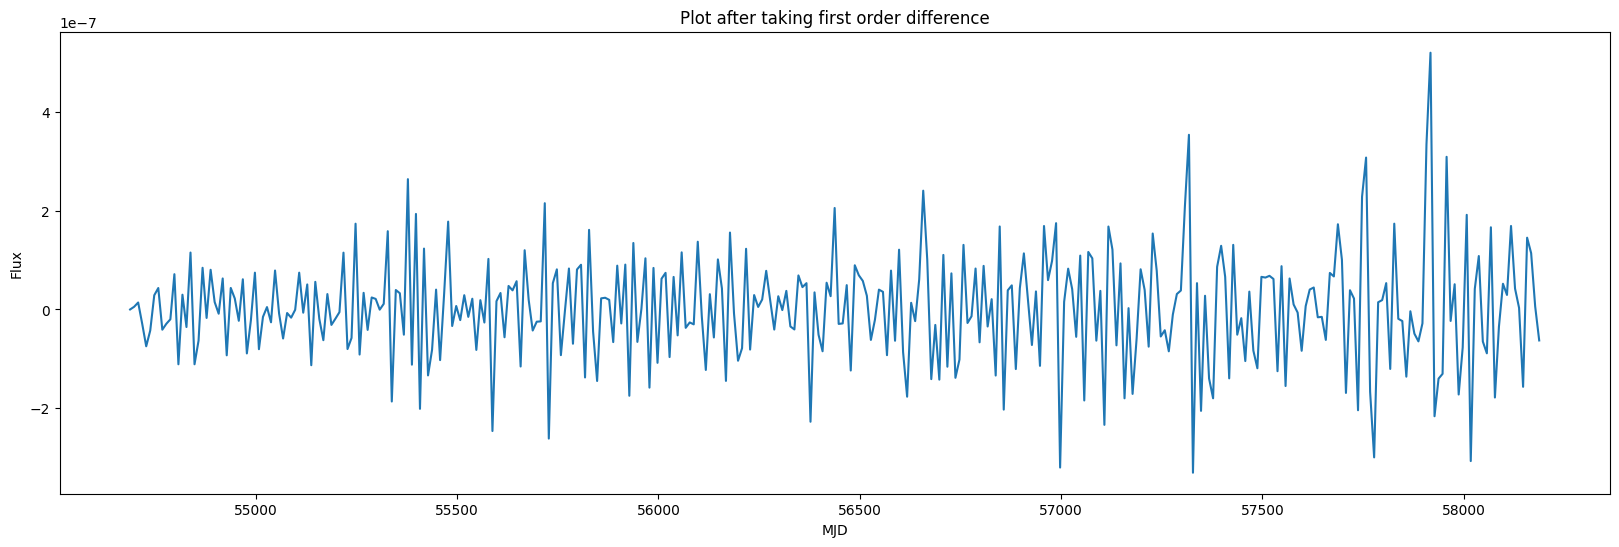

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(data["MJD"],data["FD"])
plt.title("Plot after taking first order difference")
plt.xlabel("MJD")
plt.ylabel("Flux")

In [ ]:
ad_test(data["FD"])

P value:  1.4061179734576754e-11


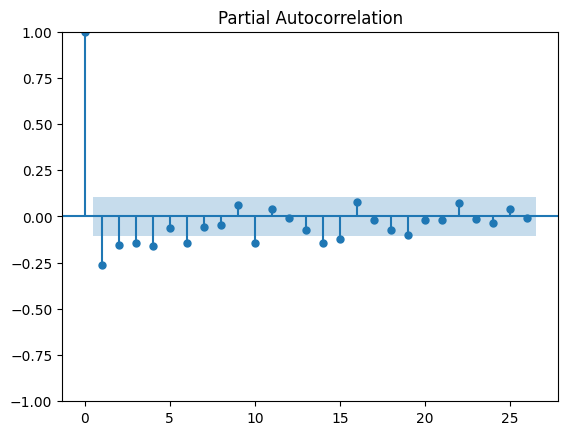

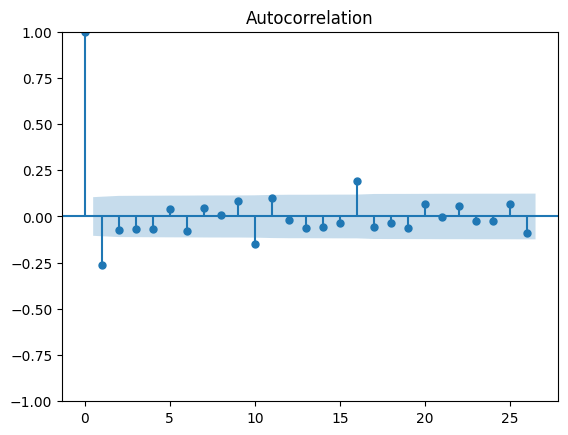

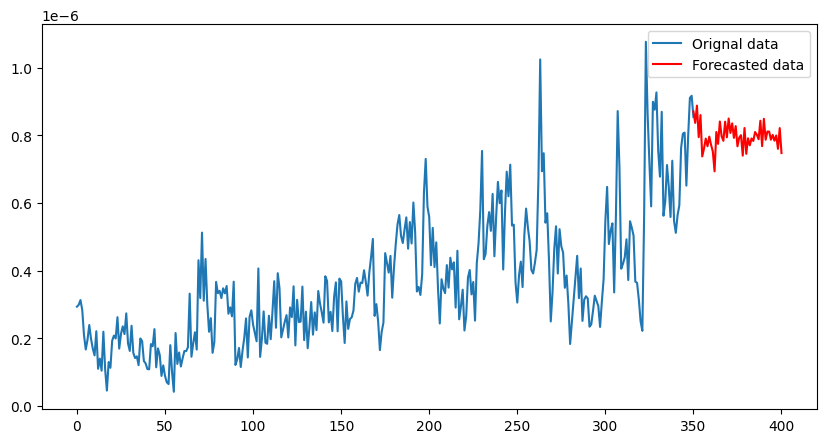

In [ ]:
fig = sm.graphics.tsa.plot_pacf(data["FD"])
fig = sm.graphics.tsa.plot_acf(data["FD"])

arima2 = AR(data['FLUX'], order=(15,1,16))
predictions1 = arima2.fit().predict(350,400)

plt.figure(figsize=(10,5))
plt.plot(data['FLUX'], label="Orignal data")
plt.legend()

plt.plot(predictions1, label="Forecasted data",color='r')
plt.legend()
plt.show()

In [ ]:
#Covid
data2 = pd.read_csv("", parse_dates=True)
plt.figure(figsize=(30,6))
x = data2["DATE"]
y = data2["Daily_Confirmed"]
plt.plot(x,y)
plt.title("Data-set for covid")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.xticks(rotation=90);

diff1 = data2['Daily_Confirmed'].diff().dropna()
diff1.plot(title="First Order Differencing",figsize=(10,5))
ad_test(diff1)

diff2 = diff1.diff().dropna()
diff2.plot(title = "Second order difference",figsize = (10,5))
ad_test(diff2)

fig21 = sm.graphics.tsa.plot_pacf(diff2,lags = 55)
fig22 = sm.graphics.tsa.plot_acf(diff2,lags = 55)

arima = AR(data2['Daily_Confirmed'], order=(14,2,15))
predictions_cov = arima.fit().predict(115,140)

plt.figure(figsize=(10,5))
plt.plot(data2['Daily_Confirmed'], label="Confirmed Cases")
plt.legend()

plt.plot(predictions_cov, label="Predicted Cases",color='r')
plt.legend()
plt.show()

P value:  0.8984569947893328
P value:  1.0426744091834329e-07


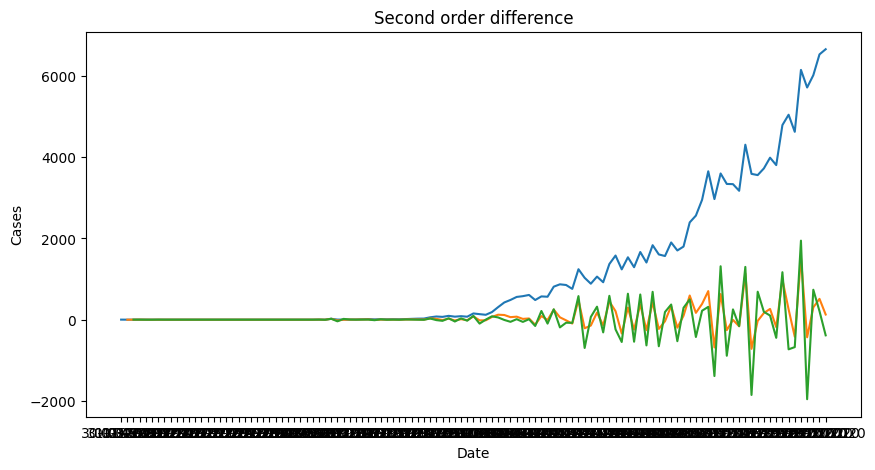

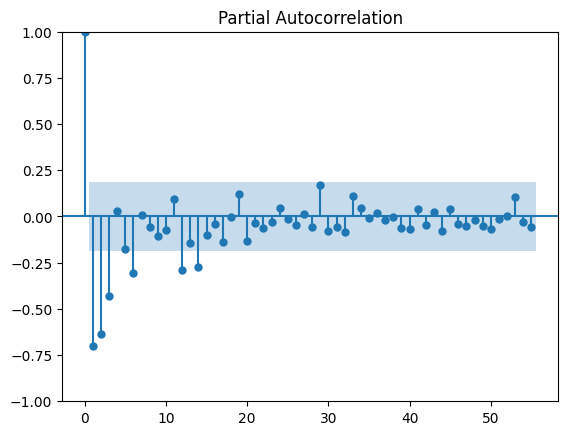

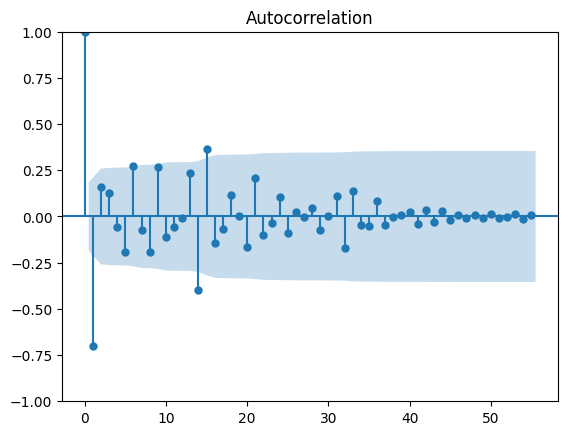

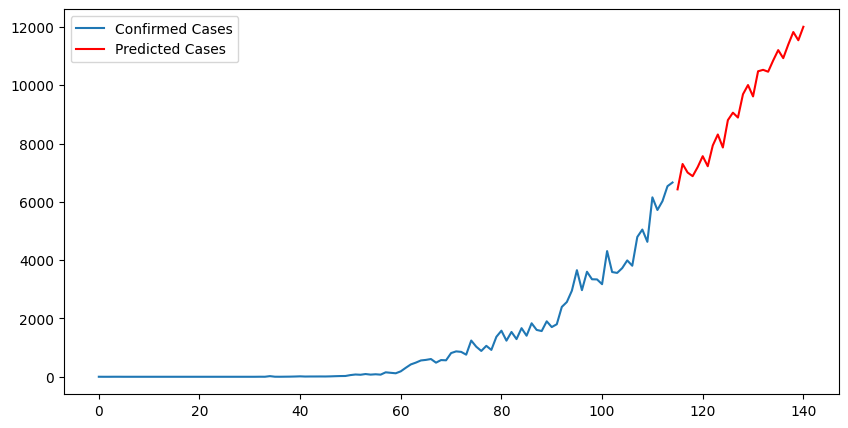

In [ ]:
#Covid
data2 = pd.read_csv("/content/drive/MyDrive/covid (2).csv", parse_dates=True)
plt.figure(figsize=(30,6))
x = data2["DATE"]
y = data2["Daily_Confirmed"]
plt.plot(x,y)
plt.title("Data-set for covid")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.xticks(rotation=90);

diff1 = data2['Daily_Confirmed'].diff().dropna()
diff1.plot(title="First Order Differencing",figsize=(10,5))
ad_test(diff1)

diff2 = diff1.diff().dropna()
diff2.plot(title = "Second order difference",figsize = (10,5))
ad_test(diff2)

fig21 = sm.graphics.tsa.plot_pacf(diff2,lags = 55)
fig22 = sm.graphics.tsa.plot_acf(diff2,lags = 55)

arima = AR(data2['Daily_Confirmed'], order=(14,2,15))
predictions_cov = arima.fit().predict(115,140)

plt.figure(figsize=(10,5))
plt.plot(data2['Daily_Confirmed'], label="Confirmed Cases")
plt.legend()

plt.plot(predictions_cov, label="Predicted Cases",color='r')
plt.legend()
plt.show()